In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, true_positive_rate
import numpy as np

In [2]:
#Datei einlesen
df = pd.read_csv("Medicaldataset.csv")
#df = pd.read_csv(r"C:\Users\zahri\anaconda_projects\AsaiProjekt\Asai-Projekt\Medicaldataset.csv")
df = pd.read_csv("/Users/aurelia/Documents/GitHub/Asai-Projekt/Medicaldataset.csv")
#df = pd.read_csv(r"C:\Users\Aurelia\OneDrive\Dokumente\GitHub\Asai-Projekt\Medicaldataset.csv")
df_orginal = df.copy()

In [3]:
#DataFrame-Beispiel Daten
styled_df = df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.000000,1.800000,0.012000,negative
1,21,1,94,98,46,296.000000,6.750000,1.060000,positive
2,55,1,64,160,77,270.000000,1.990000,0.003000,negative
3,64,1,70,120,55,270.000000,13.870000,0.122000,positive
4,55,1,64,112,65,300.000000,1.080000,0.003000,negative
5,58,0,61,112,58,87.000000,1.830000,0.004000,negative
6,32,0,40,179,68,102.000000,0.710000,0.003000,negative
7,63,1,60,214,82,87.000000,300.000000,2.370000,positive
8,44,0,60,154,81,135.000000,2.350000,0.004000,negative
9,67,1,61,160,95,100.000000,2.840000,0.011000,negative


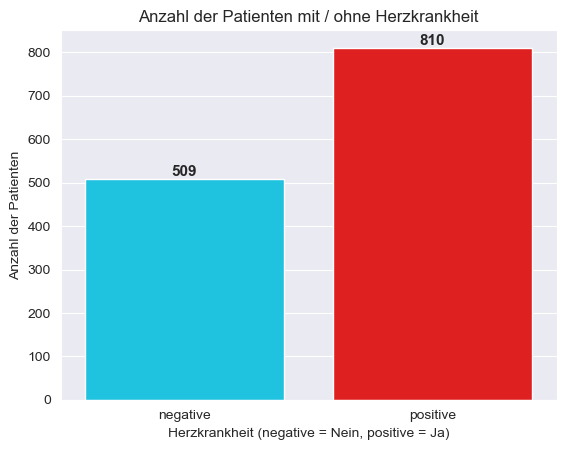

Anzahl der Zeilen (Patienten): 1319
Anzahl der Spalten (Features): 9


In [4]:
#Balkendiagramm Anteil Herzerkrankte

# Balkendiagramm
ax = sns.countplot(x='Result', hue='Result', data=df, palette=['#00d9ff', '#ff0000'], legend=False)

# Achsentitel
plt.title('Anzahl der Patienten mit / ohne Herzkrankheit')
plt.xlabel('Herzkrankheit (negative = Nein, positive = Ja)')
plt.ylabel('Anzahl der Patienten')

# Zahlen über Balken schreiben
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

# Plot anzeigen
plt.show()
print(f"Anzahl der Zeilen (Patienten): {df.shape[0]}")
print(f"Anzahl der Spalten (Features): {df.shape[1]}")

In [6]:
# Daten Vorverarbeitung
# Duplikate checken
# Alle duplizierten Zeilen (inkl. Erstvorkommen)
duplikate_df = df[df.duplicated(keep=False)]

# Anzahl und Prozent Duplikate
anzahl_duplikate = len(duplikate_df)
gesamt = len(df)
prozent_duplikate = (anzahl_duplikate / gesamt) * 100

# Verteilung HeartDisease(Result) in den Duplikaten
verteilung_duplikate = duplikate_df['Result'].value_counts(normalize=True) * 100

# Verteilung HeartDisease(Result) im gesamten DataFrame
verteilung_gesamt = df['Result'].value_counts(normalize=True) * 100

# Ausgabe
print("Gesamtzeilen:", gesamt)
print("Anzahl mehrfach vorkommender Zeilen:", anzahl_duplikate)
print(f"Prozent mehrfach vorkommend: {prozent_duplikate:.2f}%\n")

print("Verteilung von Heartdisease innerhalb der Duplikate:")
if not verteilung_duplikate.empty:
    for wert, proz in verteilung_duplikate.items():
        print(f"  {wert}: {proz:.2f}%")
else:
    print("    - - -")

print("\nGesamtverteilung HeartDisease:")
for wert, proz in verteilung_gesamt.items():
    print(f"  {wert}: {proz:.2f}%")

Gesamtzeilen: 1319
Anzahl mehrfach vorkommender Zeilen: 0
Prozent mehrfach vorkommend: 0.00%

Verteilung von Heartdisease innerhalb der Duplikate:
    - - -

Gesamtverteilung HeartDisease:
  positive: 61.41%
  negative: 38.59%


In [ ]:
# Duplikate entfernen
df = df.drop_duplicates()


In [ ]:
# Fehlende Werte prüfen
print(df.isnull().sum())

In [9]:
# Typprüfung
# also ob wirklich die im Datensatz angegebenen Datentypen und Beizeichnungen stimmen
def check_values(df, column_type, valid_values):
    if column_type not in df.columns:
        print(f"Spalte '{column_type}' nicht im Datensatz gefunden.")
        return

    values = df[column_type].dropna().unique()
    invalid = set(values).difference(set(valid_values))
    if invalid:
        print(f" Ungültige Werte in Spalte '{column_type}': {(invalid)} ")
    else:
        print(f"Alle Werte in Spalte '{column_type}' sind gültig ")


valid_values_dict = {
    "Result": {'negative', 'positive'}
}


def check_if_numeric(df, column_type, valid_values):
    if column_type not in df.columns:
        print(f"Spalte {column_type}' nicht im Datensatz gefunden.")
        return
    else:
        non_numeric = df[column_type].dropna().apply(lambda x: not isinstance(x, (int, float)))
        if non_numeric.any():
            count_invalid = non_numeric.sum()
            print(f"{count_invalid} nicht numerische Werte in Spalte '{column_type}'")
            print(f"Beispiele: {df[column_type][non_numeric].unique()[:5]}")
        else:
            print(f"Alle Werte in Spalte '{column_type}' sind numerisch.")

numeric_columns = [
    'Age',
    'Gender',
    'Heart rate',
    'Systolic blood pressure',
    'Diastolic blood pressure',
    'Blood sugar',
    'CK-MB',
    'Troponin',
]
# Anwendung:
for column, valid_set in valid_values_dict.items():
    check_values(df, column, valid_set)

for col in numeric_columns:
    check_if_numeric(df, col, numeric_columns)

Alle Werte in Spalte 'Result' sind gültig 
Alle Werte in Spalte 'Age' sind numerisch.
Alle Werte in Spalte 'Gender' sind numerisch.
Alle Werte in Spalte 'Heart rate' sind numerisch.
Alle Werte in Spalte 'Systolic blood pressure' sind numerisch.
Alle Werte in Spalte 'Diastolic blood pressure' sind numerisch.
Alle Werte in Spalte 'Blood sugar' sind numerisch.
Alle Werte in Spalte 'CK-MB' sind numerisch.
Alle Werte in Spalte 'Troponin' sind numerisch.


In [14]:
# Unrealistische Werte
limits = {
    'Age': (0, 120),
    'Heart rate': (40, 200),
    'Systolic blood pressure': (60, 220),
    'Diastolic blood pressure': (40, 150),
    'Blood sugar': (60, 300),
    'CK-MB': (0, 50),
    'Troponin': (0, 100),
}

print(f"Anzahl an Zeilen (vorher): {len(df)}")


def show_outliers(df, limits_dict):
    for col, (min_val, max_val) in limits_dict.items():
        invalid = df[(df[col] < min_val) | (df[col] > max_val)][col]
        print(f"{col}: {len(invalid)} Werte außerhalb ({min_val}–{max_val})")
        if not invalid.empty:
            print(f"    Beispiele: {invalid.unique()[:5]}")


def remove_outliers(df, limits_dict):
    condition = pd.Series([True] * len(df))
    for col, (min_val, max_val) in limits_dict.items():
        condition &= df[col].between(min_val, max_val)

    return df[condition]


def clip_outliers(df, limits_dict):
    df_clipped = df.copy()
    for col, (min_val, max_val) in limits_dict.items():
        before = df_clipped[col]
        below = before < min_val
        above = before > max_val

        df_clipped[col] = before.clip(lower=min_val, upper=max_val)
    print("\nClipping angewenden:")
    df = df_clipped
    show_outliers(df, limits)
    return df_clipped


show_outliers(df, limits)
clip_outliers(df, limits)
print(f"\nNeue Anzahl an Zeilen (nach Filter): {len(df)}")

Anzahl an Zeilen (vorher): 1319
Age: 0 Werte außerhalb (0–120)
Heart rate: 6 Werte außerhalb (40–200)
    Beispiele: [1111   20   36]
Systolic blood pressure: 4 Werte außerhalb (60–220)
    Beispiele: [ 42 223]
Diastolic blood pressure: 2 Werte außerhalb (40–150)
    Beispiele: [ 38 154]
Blood sugar: 78 Werte außerhalb (60–300)
    Beispiele: [319. 301. 321. 334. 392.]
CK-MB: 86 Werte außerhalb (0–50)
    Beispiele: [300.    94.79  50.46 165.1   96.08]
Troponin: 0 Werte außerhalb (0–100)

Clipping angewenden:
Age: 0 Werte außerhalb (0–120)
Heart rate: 0 Werte außerhalb (40–200)
Systolic blood pressure: 0 Werte außerhalb (60–220)
Diastolic blood pressure: 0 Werte außerhalb (40–150)
Blood sugar: 0 Werte außerhalb (60–300)
CK-MB: 0 Werte außerhalb (0–50)
Troponin: 0 Werte außerhalb (0–100)

Neue Anzahl an Zeilen (nach Filter): 1319


=== Altersverteilung ===
count    1319.000000
mean       56.191812
std        13.647315
min        14.000000
25%        47.000000
50%        58.000000
75%        65.000000
max       103.000000
Name: Age, dtype: float64


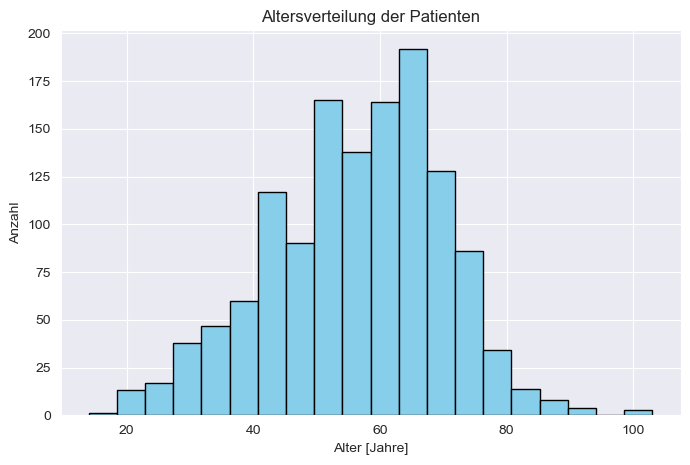

In [15]:
#Bias/Korrelation

print("Altersverteilung")
print(df['Age'].describe())

plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Altersverteilung der Patienten')
plt.xlabel('Alter [Jahre]')
plt.ylabel('Anzahl')
plt.show()

In [ ]:
print("Geschlechterverteilung ")
gender_counts = df['Sex'].value_counts()
gender_percent = df['Sex'].value_counts(normalize=True) * 100

for sex in gender_counts.index:
    print(f"{sex}: {gender_counts[sex]} Patienten ({gender_percent[sex]:.2f}%)")

plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Verteilung der Geschlechter')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.show()